<a href="https://colab.research.google.com/github/alecy100/IMMC_voting_districts/blob/main/IMMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pysal leidenalg igraph gerrychain

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [3]:
import geopandas as gpd
import seaborn
import pandas
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from pysal.lib import cg as geometry
from pysal.lib import weights
import networkx as nx

In [4]:
# URL for NC 2020 census tract shapefile (example, shapefile format)
url = "https://www2.census.gov/geo/tiger/TIGER2023/TRACT/tl_2023_37_tract.zip"
gdf = gpd.read_file(url)

In [5]:
gdf = gdf.to_crs(epsg=2264) #change coordinate reference system

In [6]:
all_data = pd.read_csv("/content/drive/MyDrive/IMMC_community/ACS data/Final - clean data/final.csv")
all_data = all_data.drop(all_data.index[0])
all_data.set_index("Geography", inplace=True)

In [7]:
gdf["centroid"] = gdf.geometry.centroid
gdf["x"] = gdf.centroid.x
gdf["y"] = gdf.centroid.y
gdf.set_index("GEOIDFQ", inplace=True)

In [8]:
gdf = gdf.merge(all_data['TotPop'], left_index=True, right_index=True)

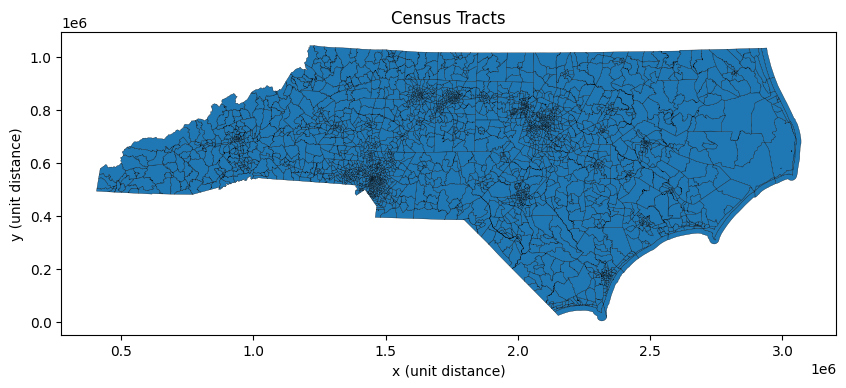

In [9]:
gdf.plot(figsize=(10, 10), edgecolor="black", linewidth=0.2)
plt.title("Census Tracts")
plt.xlabel("x (unit distance)")
plt.ylabel("y (unit distance)")
plt.show()

In [10]:
wr = weights.contiguity.Rook.from_dataframe(gdf)

/tmp/ipython-input-3850668697.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wr = weights.contiguity.Rook.from_dataframe(gdf)


In [11]:
adjacency = pandas.DataFrame(*wr.full()).astype(int)
adjacency

,0,1,2,3,4,5,6,7,8,9,...,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2670,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


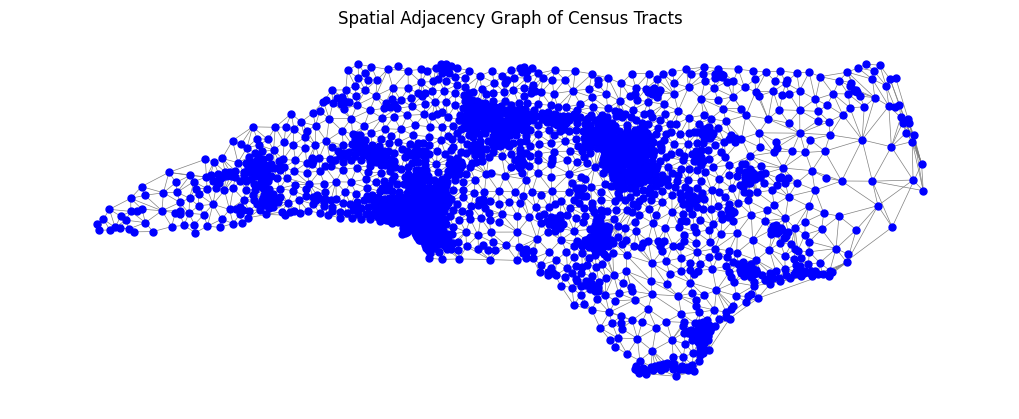

In [12]:
G = nx.from_pandas_adjacency(adjacency)

plt.figure(figsize=(10, 10))

# build positions from x,y of GeoDataFrame rows
pos = {i: (gdf.iloc[i]["x"], gdf.iloc[i]["y"]) for i in range(len(adjacency))}

nx.draw(G, pos, node_size=25, width=0.5, edge_color="gray", node_color="blue")
plt.gca().set_aspect('equal')
plt.title("Spatial Adjacency Graph of Census Tracts")
plt.show()

In [13]:
dem_df = pd.read_csv("/content/drive/MyDrive/IMMC_community/ACS data/Final - clean data/final_demographic.csv")
dem_df.set_index("Tract", inplace=True)
dem_df = dem_df.reindex(gdf.index)
dem_df

,pct_white_nh,pct_black_nh,pct_asian_nh,pct_hispanic,pct_other_multi,pct_under18,pct_18_34,pct_34_65,pct_65plus,pct_foreign_naturalized,pct_foreign_noncitizen,pct_native,pct_english_only,pct_spanish,pct_limited_english,pct_non_english
1400000US37179020501,0.380723321,0.2202031,0.003563157,0.317299127,0.144307857,0.255300196,0.24585783,0.331195439,0.167646535,0.07696419,0.099233921,0.823801888,0.783261803,0.197424893,0.030579399,0.216738197
1400000US37179020308,0.634115084,0.123414072,0.049852621,0.161348199,0.041650647,0.313981802,0.180827887,0.407791875,0.097398436,0.081635268,0.072279892,0.846084839,0.722244329,0.132510943,0,0.277755671
1400000US37179020317,0.648991276,0.130997819,0.017584515,0.147082879,0.091603053,0.282715376,0.223146129,0.389721919,0.104416576,0.051254089,0.073609597,0.875136314,0.802872063,0.121409922,0.012184508,0.197127937
1400000US37179020312,0.665407687,0.108864697,0.020662075,0.129304599,0.125527661,0.218173739,0.27438347,0.434347923,0.073094868,0.028438125,0.043768052,0.927793824,0.843618933,0.113840623,0.049730377,0.156381067
1400000US37179021015,0.728103741,0.208971088,0.016156463,0.024659864,0.038903061,0.218537415,0.132227891,0.449192177,0.200042517,0.015306122,0.034863946,0.949829932,0.861986913,0.052944676,0.009518144,0.138013087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400000US37063000500,0.428674352,0.341498559,0.061239193,0.117915466,0.088136407,0.153458213,0.432516811,0.301152738,0.112872238,0.04154659,0.105667627,0.852785783,0.761620186,0.091633466,0.013944223,0.238379814
1400000US37063000600,0.568635522,0.173698292,0.050627701,0.118131303,0.177814365,0.162790698,0.181313027,0.534883721,0.121012554,0.067091994,0.0730603,0.859847705,0.845100556,0.071459136,0.017115961,0.154899444
1400000US37063000700,0.642498746,0.176869042,0.042398394,0.057701957,0.15880582,0.175865529,0.316608128,0.370045158,0.137481184,0.047917712,0.040140492,0.911941796,0.805741627,0.059330144,0,0.194258373
1400000US37063000900,0.169456067,0.371338912,0.016213389,0.373953975,0.099895397,0.183054393,0.283995816,0.434100418,0.098849372,0.023535565,0.255230126,0.72123431,0.616049383,0.297530864,0.19382716,0.383950617


In [14]:
econ_df = pd.read_csv("/content/drive/MyDrive/IMMC_community/ACS data/Final - clean data/final_economic.csv")
econ_df.set_index("Tract", inplace=True)
econ_df = econ_df.reindex(gdf.index)
econ_df

,pct_low_income,pct_med_income,pct_high_income,pct_less_hs,pct_hs,pct_college,pct_labor_force_participation,unemployment_rate,pct_owner
1400000US37179020501,0.194742489,0.372854077,0.432403433,0.152380952,0.514845938,0.332773109,0.666976528,0.042528469,0.661480687
1400000US37179020308,0.123756466,0.280143255,0.596100279,0.122231172,0.46778091,0.409987918,0.730319149,0.029432624,0.792280143
1400000US37179020317,0.087032202,0.265448216,0.647519582,0.033727551,0.385676741,0.580595707,0.766720459,0.024206563,0.841601393
1400000US37179020312,0.150389455,0.419412822,0.430197723,0.047373841,0.607964298,0.344661861,0.80739726,0.064383562,0.664469742
1400000US37179021015,0.143367043,0.470553242,0.386079714,0.09395185,0.446271286,0.459776864,0.544562129,0.011883234,0.920285544
...,...,...,...,...,...,...,...,...,...
1400000US37063000500,0.452855246,0.282868526,0.264276228,0.163527397,0.330907534,0.505565068,0.538547486,0.020391061,0.250332005
1400000US37063000600,0.196405648,0.367993154,0.435601198,0.070281653,0.295867334,0.633851013,0.719764012,0.018436578,0.622165169
1400000US37063000700,0.314832536,0.268421053,0.416746411,0.040880503,0.187631027,0.77148847,0.669642857,0.029464286,0.3784689
1400000US37063000900,0.209876543,0.434567901,0.355555556,0.302987198,0.297297297,0.399715505,0.736102627,0.012828345,0.418518519


In [15]:
mobility_df = pd.read_csv("/content/drive/MyDrive/IMMC_community/Similarity matrices/Mobility matrix/nc_mobility_matrix_normalized.csv")
mobility_df.rename(columns={"Unnamed: 0": "Tract"}, inplace=True)
mobility_df.set_index("Tract", inplace=True)
mobility_df

,37179020501,37179020308,37179020317,37179020312,37179021015,37179021009,37179021012,37179020310,37119000900,37119001000,...,37185950103,37063000200,37063000302,37063000401,37063000402,37063000500,37063000600,37063000700,37063000900,37063001001
Tract,,,,,,,,,,,,,,,,,,,,,
37179020501,0.270133,0.082116,0.055831,0.083796,0.048969,0.020314,0.031670,0.042938,0.000889,0.003553,...,0.000000,0.000000,0.000000,0.000889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37179020308,0.082116,0.072844,0.014162,0.060956,0.000889,0.008867,0.004440,0.001778,0.000000,0.003553,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000889,0.001778,0.000000,0.000000
37179020317,0.055831,0.014162,0.150223,0.067761,0.004440,0.005327,0.004440,0.015922,0.000000,0.000889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37179020312,0.083796,0.060956,0.067761,0.194423,0.034278,0.015042,0.036014,0.059249,0.003553,0.001778,...,0.000000,0.000889,0.000000,0.001778,0.001778,0.000000,0.002666,0.000000,0.000000,0.000000
37179021015,0.048969,0.000889,0.004440,0.034278,0.153426,0.007098,0.008867,0.002666,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000889,0.000000,0.000000,0.000889,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37063000500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000889,0.000000,0.000000,...,0.000000,0.014162,0.008867,0.019436,0.025566,0.024692,0.023818,0.022067,0.004440,0.010634
37063000600,0.000000,0.000889,0.000000,0.002666,0.000000,0.000000,0.000000,0.000889,0.000889,0.000000,...,0.000889,0.046387,0.017680,0.029057,0.040345,0.023818,0.159809,0.023818,0.004440,0.019436
37063000700,0.000000,0.001778,0.000000,0.000000,0.000889,0.000000,0.000000,0.000889,0.000000,0.000889,...,0.000889,0.015042,0.015042,0.033409,0.030800,0.022067,0.023818,0.097993,0.001778,0.006213


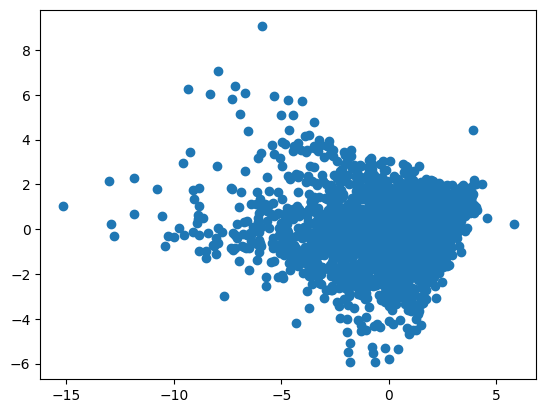

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dem_df_cleaned = dem_df.apply(pd.to_numeric, errors='coerce')
dem_df_cleaned = dem_df_cleaned.fillna(dem_df_cleaned.mean())

scaler = StandardScaler()
scaler.set_output(transform='pandas')
dem_df_standardized = scaler.fit_transform(dem_df_cleaned)

pca_dem = PCA(n_components=2)
projections = pca_dem.fit_transform(dem_df_standardized)

plt.scatter(projections[:, 0], projections[:, 1])
plt.show()

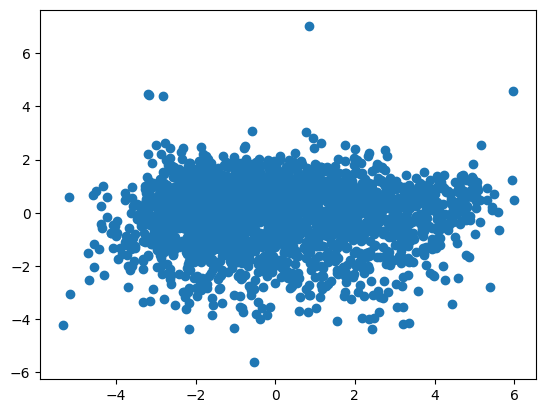

In [17]:
econ_df_cleaned = econ_df.apply(pd.to_numeric, errors='coerce')
econ_df_cleaned = econ_df_cleaned.fillna(econ_df_cleaned.mean())

scaler = StandardScaler()
scaler.set_output(transform='pandas')
econ_df_standardized = scaler.fit_transform(econ_df_cleaned)

pca_econ = PCA(n_components=2)
projections = pca_econ.fit_transform(econ_df_standardized)

plt.scatter(projections[:, 0], projections[:, 1])
plt.show()

In [18]:
demographic_weights = {
    "pct_white_nh": 1.5,
    "pct_black_nh": 1.5,
    "pct_asian_nh": 1.5,
    "pct_hispanic": 1.5,
    "pct_other_multi": 1.0,

    "pct_under18": 0.5,
    "pct_18_34": 0.5,
    "pct_34_65": 0.5,
    "pct_65plus": 0.5,

    "pct_foreign_naturalized": 1.0,
    "pct_foreign_noncitizen": 1.0,
    "pct_native": 1.0,

    "pct_english_only": 1.0,
    "pct_spanish": 1.2,
    "pct_limited_english": 1.2,
    "pct_non_english": 1.0,
}

economic_weights = {
    "pct_low_income": 1.5,
    "pct_med_income": 1.3,
    "pct_high_income": 1.5,

    "pct_less_hs": 1.3,
    "pct_hs": 1.0,
    "pct_college": 1.3,

    "pct_labor_force_participation": 1.0,
    "unemployment_rate": 1.0,

    "pct_owner": 0.8,
}

In [19]:
import math
dem_w = numpy.zeros(dem_df_cleaned.shape[1])
for i in range(len(dem_w)):
  dem_w[i] = math.sqrt(demographic_weights[dem_df_cleaned.columns[i]])

econ_w = numpy.zeros(econ_df_cleaned.shape[1])
for i in range(len(econ_w)):
  econ_w[i] = math.sqrt(economic_weights[econ_df_cleaned.columns[i]])

# print(dem_w)
# print(econ_w)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
c1 = 1
c2 = 1
c3 = 1
for i, j in G.edges():
  ud = dem_df_standardized.iloc[i].to_numpy()*dem_w
  vd = dem_df_standardized.iloc[j].to_numpy()*dem_w
  dsim = (cosine_similarity(ud.reshape(1, -1), vd.reshape(1, -1)).item()+1)/2

  ue = econ_df_standardized.iloc[i].to_numpy()*econ_w
  ve = econ_df_standardized.iloc[j].to_numpy()*econ_w
  esim = (cosine_similarity(ue.reshape(1, -1), ve.reshape(1, -1)).item()+1)/2

  similarity = c1*dsim + c2*esim + c3*float(mobility_df.iloc[i, j])
  #print(similarity)
  G[i][j]['weight'] = similarity

In [22]:
import igraph as ig
import leidenalg as la

ig_graph = ig.Graph.from_networkx(G)
#print(ig_graph.es["weight"])

In [23]:
partition = la.find_partition(
    ig_graph,
    la.CPMVertexPartition,
    weights=ig_graph.es["weight"],
    resolution_parameter=0.3
)

ig.plot(partition)

/tmp/ipython-input-27046006.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', num_comms)


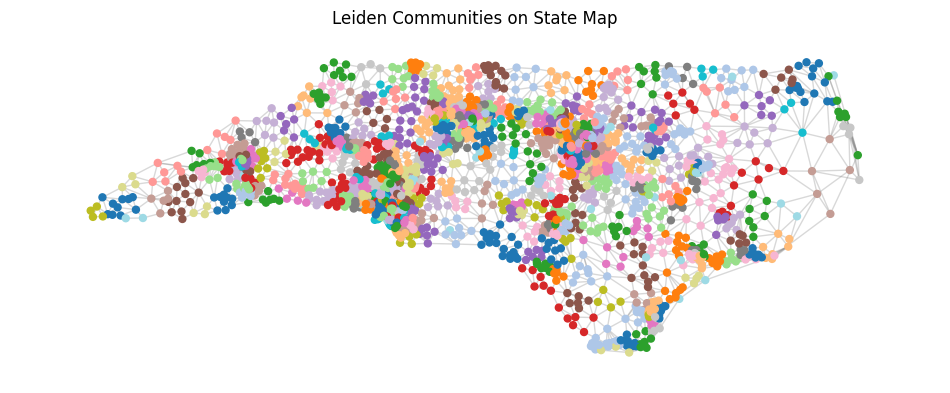

In [24]:
import matplotlib.cm as cm

node_names = ig_graph.vs["_nx_name"]  # GEOID names from NetworkX conversion
pos = {name: (gdf.loc[gdf.index[name]]['x'], gdf.loc[gdf.index[name]]['y']) for name in node_names}

communities = partition.membership
community_dict = {node: comm for node, comm in zip(node_names, communities)}

num_comms = len(set(communities))
cmap = cm.get_cmap('tab20', num_comms)
node_colors = [cmap(community_dict[n]) for n in G.nodes()]

plt.figure(figsize=(12, 12))

nx.draw_networkx_edges(G, pos=pos, alpha=0.3, edge_color='gray')

nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors, node_size=25)
plt.gca().set_aspect('equal')
plt.title("Leiden Communities on State Map")
plt.axis('off')
plt.show()

In [25]:
gdf_com = gdf.copy(deep=True)
gdf_com["community"] = communities

In [26]:
community_nodes = gdf_com.groupby("community").agg({
    "TotPop": "sum",        # total population per community
    "x": "mean",            # centroid x-coordinate
    "y": "mean"             # centroid y-coordinate
}).reset_index()

community_edges = set()
for u, v in G.edges():             # iterate tract-level edges
    comm_u = gdf_com.iloc[u]["community"]
    comm_v = gdf_com.iloc[v]["community"]
    if comm_u != comm_v:
        community_edges.add(tuple(sorted((comm_u, comm_v))))

# Create community-level graph
G_comm = nx.Graph()
for idx, row in community_nodes.iterrows():
    G_comm.add_node(row["community"], TotPop=row["TotPop"], x=row["x"], y=row["y"])

G_comm.add_edges_from(community_edges)

print("Community-level graph created!")
print("Number of communities:", G_comm.number_of_nodes())
print("Number of edges:", G_comm.number_of_edges())

Community-level graph created!
Number of communities: 486
Number of edges: 1353


/tmp/ipython-input-2503334380.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", num_comms)


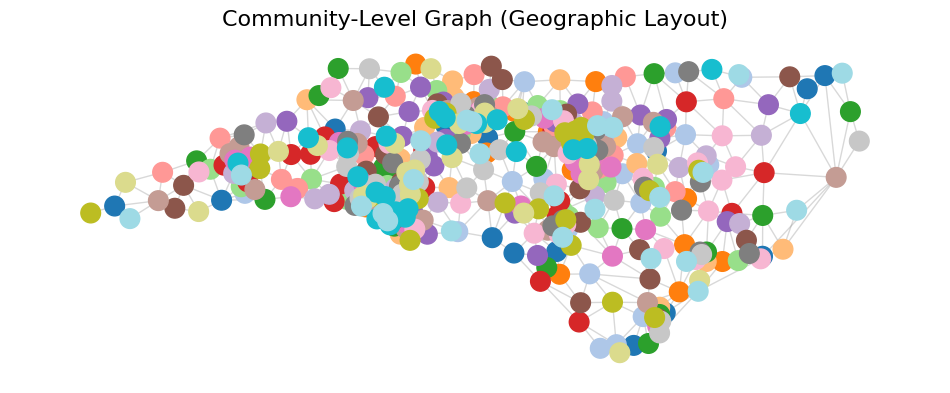

In [27]:
pos = {row["community"]: (row["x"], row["y"])
       for idx, row in community_nodes.iterrows()}

communities = list(G_comm.nodes())
num_comms = len(communities)
cmap = cm.get_cmap("tab20", num_comms)
node_colors = [cmap(i) for i in range(num_comms)]

plt.figure(figsize=(12, 12))

nx.draw_networkx_edges(G_comm, pos=pos, alpha=0.3, edge_color='gray')

nx.draw_networkx_nodes(G_comm, pos=pos, node_color=node_colors, node_size=200)

plt.title("Community-Level Graph (Geographic Layout)", fontsize=16)
plt.gca().set_aspect('equal')
plt.axis("off")
plt.show()


In [28]:
from gerrychain import Graph, Partition
from gerrychain.updaters import Tally, cut_edges
import random


n_districts= 14
ideal_population = 10584340/14

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [29]:
graph = Graph.from_networkx(G_comm)

initial_partition = Partition.from_random_assignment(
    graph=graph,
    n_parts=14,            # number of districts
    epsilon=0.01,          # allowed deviation from ideal population
    pop_col="TotPop",      # population column
    updaters={
        "population": Tally("TotPop", alias="population"),
        "cut_edges": cut_edges
    }
)

In [30]:
for district, pop in initial_partition["population"].items():
    print(f"District {district}: {pop}")

District 0: 760720.0
District 1: 756134.0
District 2: 752764.0
District 3: 755339.0
District 4: 761110.0
District 5: 748834.0
District 6: 759423.0
District 7: 758887.0
District 8: 753863.0
District 9: 754485.0
District 10: 752811.0
District 11: 752835.0
District 12: 757965.0
District 13: 759170.0


In [31]:
from gerrychain import MarkovChain
from gerrychain.constraints import contiguous
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from functools import partial

ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)

proposal = partial(
    recom,
    pop_col="TotPop",
    pop_target=ideal_population,
    epsilon=0.01,
    node_repeats=3
)

chain = MarkovChain(
    proposal=proposal,
    constraints=[contiguous],
    accept=always_accept,
    initial_state=initial_partition,
    total_steps=500
)